In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Mergin Datasets

In [2]:
pyber_data_df = pd.merge(ride_data_df, city_data_df,how='left',on=['city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df.groupby("type").mean()["fare"]

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [4]:
pyber_data_df.groupby('city').mean()['fare'].head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [5]:
# Create different dataframes for each city type
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Create a series of ride count for each type
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [7]:
# Create a series for the average ride of each city by type
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [8]:
# Create a series for the average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

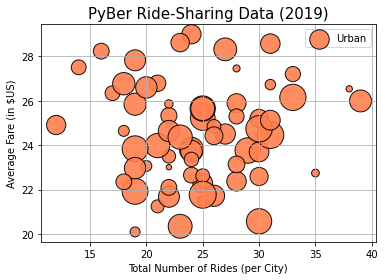

In [9]:
# Create a scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=[i*10 for i in urban_driver_count], 
            c='coral', label='Urban', edgecolor='black', 
            alpha=0.9, linewidths=1
           )
plt.title('PyBer Ride-Sharing Data (2019)',fontsize=15)
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare (in $US)')
plt.grid()
plt.legend()

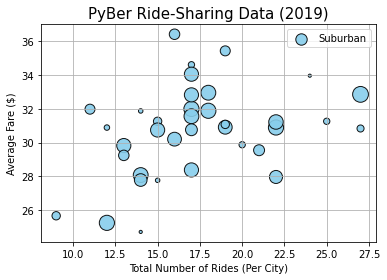

In [10]:
# Create a scatter plot for suburban cities
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.9, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=15)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()

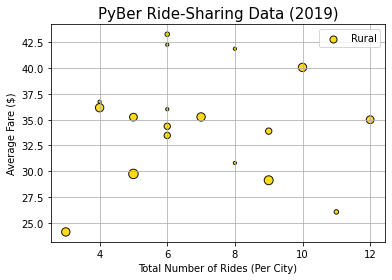

In [11]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.9, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=15)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()

### Combining all charts

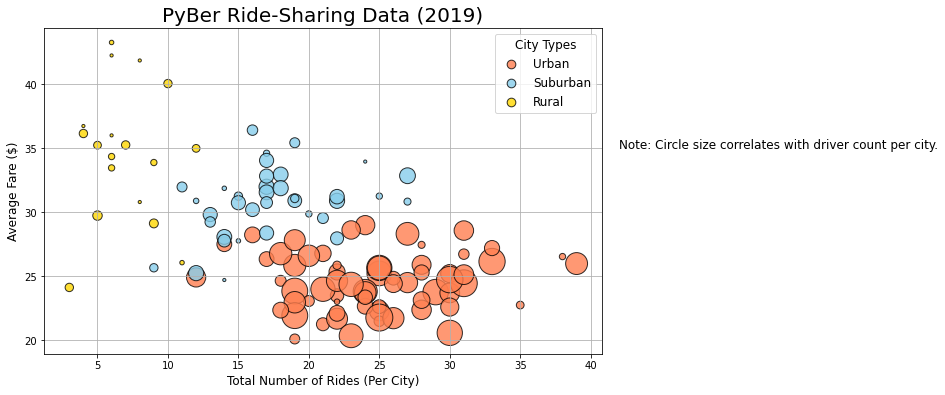

In [13]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend and modify it
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

In [14]:
urban_ride_count.describe(), suburban_ride_count.describe(), rural_ride_count.describe()

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [15]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [16]:
suburban_ride_count.mode()

0    17
dtype: int64

### Implementing Numpy and and scipy libs

In [18]:
import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [19]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [20]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [21]:
np.mean(rural_cities_df.fare), np.mean(suburban_cities_df.fare)

(34.623440000000016, 30.97012800000002)

In [22]:
urban_drivers = urban_cities_df.driver_count
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [23]:
np.mean(suburban_cities_df.driver_count)

13.712

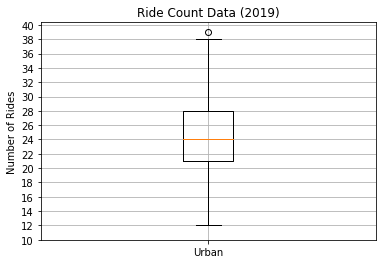

In [24]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

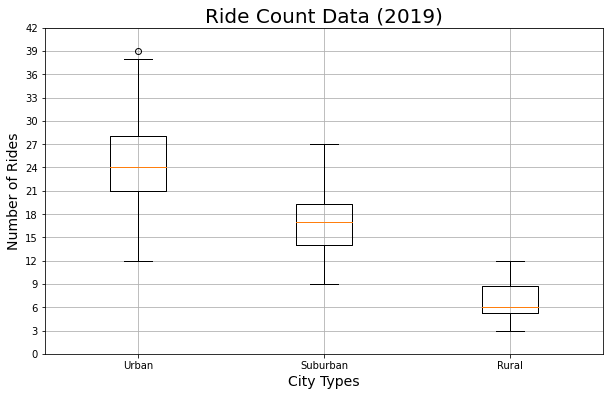

In [26]:
#Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()

In [27]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


In [28]:
suburban_fares = suburban_cities_df.fare
rural_fares = rural_cities_df.fare

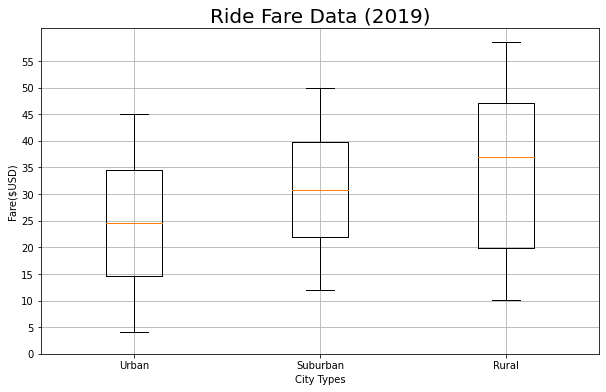

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [30]:
# Create  box-and-whisker plot for urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([urban_fares,suburban_fares,rural_fares], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0,56,5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [31]:
rural_drivers = rural_cities_df.driver_count
suburban_drivers = suburban_cities_df.driver_count

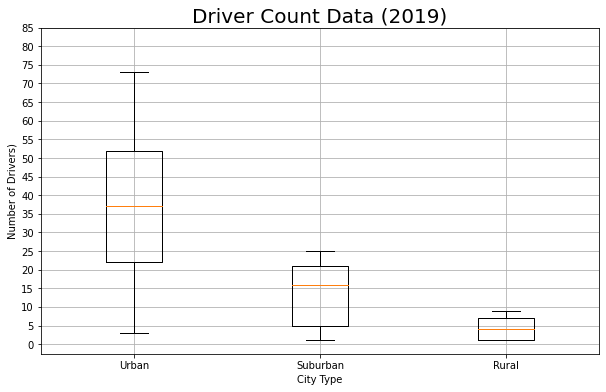

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [33]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([urban_drivers,suburban_drivers,rural_drivers],labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers)')
ax.set_xlabel('City Type')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

### Pie Chart

In [34]:
# Calculate total fares by city type
sum_fares_by_type = pyber_data_df.groupby('type').sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [35]:
# Calculate the sum of all fares (revenue)
total_fares = pyber_data_df.fare.sum()
total_fares

63538.64

In [36]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

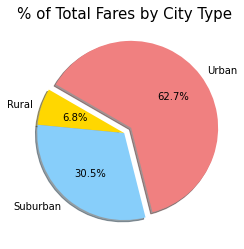

In [37]:
x_labels = ['Rural','Suburban','Urban']
plt.pie(type_percents, labels=x_labels, autopct='%.1f%%',
       colors=['gold','lightskyblue','lightcoral'], startangle=150,
       shadow=True, explode=[0,0,0.1])
plt.title('% of Total Fares by City Type', fontsize=15)

plt.show()

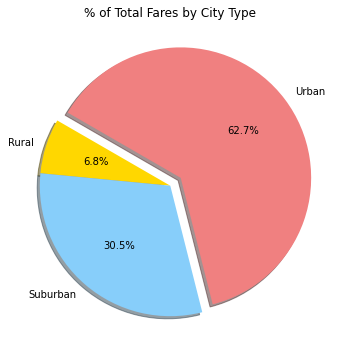

In [43]:
# Change pie chart characteristics
import matplotlib as mpl
mpl.rcParams['font.size'] = 10

plt.subplots(figsize=(10,6))
plt.pie(type_percents,
       labels=x_labels,
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
       autopct='%.1f%%',
       shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
plt.show()

### Second Pie Chart

In [44]:
# Calculate ride count for each city type
ride_count_per_type = pyber_data_df.groupby('type').count()['ride_id']
ride_count_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [45]:
# Calculate total number of rides
total_ride_count = ride_count_per_type.sum()
total_ride_count

2375

In [46]:
ride_percents = ride_count_per_type / total_ride_count * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

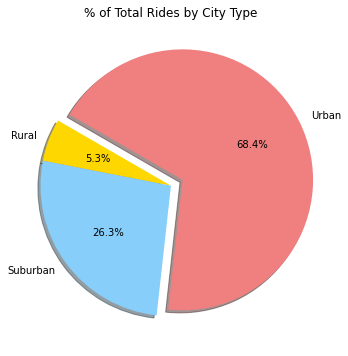

In [48]:
plt.subplots(figsize=(8,6))
plt.pie(ride_percents,
       labels=['Rural','Suburban','Urban'],
       explode=[0,0,0.1],
       autopct='%.1f%%',
       shadow=True, startangle=150,
       colors=['gold','lightskyblue','lightcoral'])
plt.title('% of Total Rides by City Type')
plt.show()

In [49]:
driver_count_by_type =  city_data_df.groupby('type').sum()['driver_count']
driver_count_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [50]:
total_drivers_count = city_data_df.driver_count.sum()
total_drivers_count

2973

In [51]:
drivers_percents = driver_count_by_type / total_drivers_count * 100
drivers_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

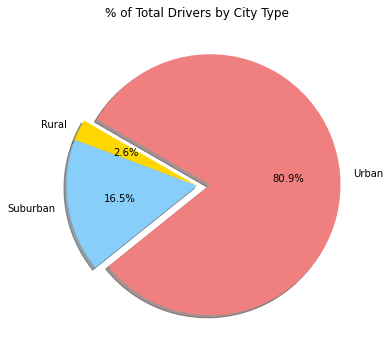

In [54]:
plt.subplots(figsize=(8,6))
plt.pie(drivers_percents,
       labels=['Rural','Suburban','Urban'],
       explode=[0,0,0.1],
       autopct='%.1f%%',
       shadow=True, startangle=150,
       colors=['gold','lightskyblue','lightcoral'])
plt.title('% of Total Drivers by City Type')
plt.show()